<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

In [0]:
from tensorflow import keras
%tensorflow_version 2.x

# **Redes Neuronales Recurrentes**

## **Introducción**

Hasta el momento, los problemas que hemos analizados se reducen a un data set de tamaño fijo, sobre el cual realizabamos un problema de clasificación (binaria o multiclase) o regresión. Qué pasaría, por ejemplo, si deseamos realizar una predicción sobre una base de datos dependiente del tiempo, como el mercádo bursatil, los sistemas de conducción autómatas, las predicciones del tiempo en una región, etc. 

Las **redes neuronales recurrentes** (RNN - Recurrent Neural Networks), nos proporsiona una serie de algoritmos potentes para abordar este tipo de problemas. De forma general, este tipo de redes pueden aplicarse en secuencias de longitud arbitraria. 

Alguna de las principales aplicaciones de las RNN son

- Predicciones del mercado bursatil, con el fin de saber cuando invertir.
- Predicción de trayectorias en conducción autómata.
- Procesamiento de lenguajes naturales: reconocimiento de voz, traducción automática, transcripción/traducción automática de voz a texto.
- Entre otras.

Empezaremos por ver los conceptos subyacentes a las RNN y como entrenarlas usando la retropropagación en el tiempo. Debemos tener en cuenta que las RNN presentan los siguientes problemas:

- Gradientes inestables: que pueden tratarse, entre otra cosas, con dropout recurrente o normalización por capas recurrentes.
- Memoria a corto plazo limitada, que puede ampliarse mediante el uso de unidades LSTM o GRU.

## **Recurrencia:**

Hasta el momento, hemos visto una arquitectura de red (FNN) en donde las activaciones ocurren a lo largo de una sola dirección: de las capas de entrada a las de salida. Las RNN son muy parecidas a las FNN, con la excepción que poseen una conexión hacia atras. El caso más sencillo de una RNN consiste en una neurona que recibe una entrada y produce una salida que reenvia a si misma (figura izquierda).  En cada paso de tiempo $t$ (conocido como frame/marco), la neurona recurrente recibe la entrada $\mathbf{x}(t)$, así como la salida que produce en el paso de tiempo anterior, $y(t-1)$. Dado que en el primer paso de tiempo no existe una salida previa, normalmente esta se inicializa en $0$ (ver figura de la derecha).  


![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/rnn.png?raw=true)

Podemos crear fácilmente una capa compuesta por neuronas recurrentes. En cada paso de tiempo $t$, cada neurona recibe el vector de entrada $\mathbf{x}(t)$ y el vector generado en el paso anterior $\mathbf{y}(t-1)$, como se muestra en la figura siguiente, en donde se ilustra también la red neuronal recurrente "deserrollada" en el tiempo. Nótese ahora que tanto las entradas como las salidas son vectores. 

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/recurrent_layer.png?raw=true)

Nótese además que cada neurona recurrente tiene dos conjuntos de pesos:

- $\mathbf{w}_x/\mathbf{W}_x$: que corresponde al conjunto de pesos asociados a la entrada $\mathbf{x}(t)$ a una neurona/capa.
- $\mathbf{w}_y/\mathbf{W}_x$: que corresponde al conjunto de pesos asociados a la salida calculada en el paso de tiempo previo $\mathbf{y}(t-1)$ a una neurona/capa.

El vector de salida para una **sola instancia** de la capa recurrente completa puede ser calculado mediante la ecuación

\begin{equation}
\mathbf{y}(t)=\phi\big(\mathbf{W}_x^T\mathbf{x}(t)+\mathbf{W}_y^T\mathbf{y}(t-1)+\mathbf{b}\big)
\end{equation}

siendo 

 - $\mathbf{b}$ el término de bias.
 - $\phi$: La función de activación.
 
Al igual que las FNN, podemos calcular la salida para un **mini batch** de una capa recurrente en una sola pasada, colocando todas las entradas en el paso de tiempo $t$ en una matriz de entrada $\mathbf{X}(t)$:

\begin{equation} 
\begin{split}
\mathbf{Y}(t) & = \phi\big(\mathbf{X}(t)\mathbf{W}_x+\mathbf{Y}(t-1)\mathbf{W}_y+\mathbf{b}\big) \\
 & = \phi\big(\big[\mathbf{X}(t)+\mathbf{Y}(t-1)\big]\mathbf{W}+\mathbf{b}\big)
\end{split}
\end{equation}

en donde 

- \begin{align}
    \mathbf{W} &= \begin{bmatrix}
           \mathbf{W}_x \\
           \mathbf{W}_y 
         \end{bmatrix}
  \end{align}

- $\mathbf{Y}(t)$: es una matriz de $m\times n_\text{neuronas}$ que contiene las salidas de las capas en el paso de tiempo $t$ para cada instancia del mini-batch de tamaño $m$. 
- $\mathbf{X}(t):$ es una matriz de $m\times n_\text{entradas}$ que contine las entradas de todas las instancias.
- $\mathbf{W}_x:$ es una matriz de $n_\text{entradas}\times n_\text{neuronas}$ que contiene los pesos de conexión de las entradas del paso de tiempo actual.
- $\mathbf{W}_y:$ es una matriz de $n_\text{neuronas}\times n_\text{neuronas}$ que contiene los pesos de conexión de las salidas del paso de tiempo previo.
- $\mathbf{b}:$ es un vector de tamaño $n_\text{neuronas}$ que contiene los términos de bias asociados a cada neurona.
- Las matrices de pesos $\mathbf{W}_x$ y $\mathbf{W}_y$ se concatenan, normalmente, de forma vertical para formar una matriz única $\mathbf{W}$ de dimensiones $(n_\text{entradas}+n_\text{neuronas})\times n_\text{neuronas}$.
- $\big[\mathbf{X}(t)+\mathbf{Y}(t-1)\big]$: representa la concatenación horizontal de las matrices $\mathbf{X}(t)$ e $\mathbf{Y}(t-1)$.

Nótese que la función $\mathbf{Y}(t)$ es una función de $\mathbf{X}(t)$ y $\mathbf{Y}(t-1)$, que a su vez es función de $\mathbf{X}(t-1)$ y $\mathbf{Y}(t-2)$, y así sucesivamente. Lo anterior demuestra que $\mathbf{Y}(t)$ es una función del de todas las entradas desde $t=0$ ($\mathbf{X}(0), \mathbf{X}(1),\cdots, \mathbf{X}(t)$). En el primer paso de tiempo, $t=0$, al no existir salidas previas, normalmente se fijan en $0$. 

##**Celdas de memoria**

Como la salida de una neurona recurrente en el paso de tiempo $t$ es una función de todas las entradas en pasos de tiempos anteriores, podemos decir que tiene forma de memoria. Una parte de una red neuronal que conserva cierto estado a lo largo de pasos de tiempo se denomina **celda de memoria** (o simplemente una celda). Una sola neurona recurrente, o una capa de neuronas recurrentes, es una celda básica, capaz de aprender patrones cortos (generalmente de unos 10 pasos de tiempo). Más adelante veremos unas estructuras de celdas que permiten aumentar la "memoria" o número de pasos de tiempos almacenados.

En general, el estado de una celda en el paso de tiempo $t$, denotado $h(t)$ (donde $h$ significa "oculto"), es  función de algunas entradas pertenecientes a dicho paso de tiempo $t$ y de su estado en el paso de tiempo anterior: 

\begin{equation}
h (t) = f (h (t – 1), x (t))
\end{equation}

Su salida en el tiempo $t$, denotada como $y(t)$, también es una función del estado anterior y las entradas actuales. En el caso de las celdas básicas que hemos discutido hasta ahora, la salida es simplemente igual al estado, pero en celdas más complejas este no es siempre el caso, como se muestra en la figura.

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/rn_state_output.png?raw=true)

##**Secuencias**

Una limitación evidente de las FNN o las CNN es que su API es limitada: aceptan un vector de tamaño fijo como entrada (por ejemplo, una imagen) y producen un vector de tamaño fijo como salida (por ejemplo, probabilidades de diferentes clases); no solo eso: estos modelos realizan esta asignación utilizando una cantidad fija de pasos computacionales (por ejemplo, el número de capas en el modelo). La razón principal por la que las RNN resultan "mas emocionantes" es que nos permiten operar sobre secuencias de vectores: secuencias en la entrada, la salida o, en el caso más general, en ambas. Veamos algunos ejemplos concretos ilustrados en la siguiente figura. 

 
![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/rnn_sequences.png?raw=true)


Cada rectángulo representa un vector y las flechas corresponden a funciones. Los vectores de entrada se ilustran en rojo, los vectores de salida en azul y los vectores verdes corresponden al de la RNN.

- **One to one:** Se parte de una entrada de tamaño fijo hasta una salida de tamaño fijo (por ejemplo, clasificación de imágenes) y corresponde a una . 
- **One to many:** Conocida también como **vector a secuencia** (varios vectores en el tiempo), corresponde al caso en que de una entrada se obtienen varias salidas. Por ejemplo, los subtitulos en una imagen toman como entrada a la imagen y generan una oración o palabra.
- **Many to one:** Conocida también como **secuencia a vector**, consiste en alimentar la red con una secuencia de entrada e ignorar todas las salidas, excepto la última. Por ejemplo, se podría alimentar a la red con una secuencia de palabras correspondiente a una reseña de película, y la red generaría una calificación.
- **Many to many:** Conocida también como **secuencia a secuencia**, toma como entrada una secuencia para obtenerse como salida otra secuencia. Este tipo de estructura resulta útil para predecir series de tiempo como los precios de las acciones: se alimenta con los precios en los últimos $N$ días, para generarse los precios desplazados un día en el futuro (es decir, desde hace N - 1 días hasta mañana).


##**Entrenamiento de RNN**

Para entrenar un RNN, el truco consiste en "desenrrollarla" a través del tiempo y luego retropropagación (ver figura). Esta estrategia se llama retropropagación a través del tiempo (BPTT).

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/bptt.png?raw=true)

Al igual que en la propagación hacia atrás normal, hay un primer paso hacia adelante en la red desenrollada (representada por las flechas discontinuas). Luego, la secuencia de salida se evalúa utilizando una función de costo $C (\mathbf{Y}(0), \mathbf{Y}(1),\cdots,\mathbf{Y}(T))$ (donde $T$ es el paso de tiempo máximo).Dentro de esta función de costo se puede ignorar algunas salidas, como se muestra en la figura; por ejemplo, en una RNN de **secuencia a vector**, todas las salidas se ignoran excepto la última. Los gradientes de esa función de costo se propagan hacia atrás a través de la red desenrollada (las flechas sólidas). Finalmente, los parámetros del modelo se actualizan utilizando los gradientes calculados durante BPTT. Los gradientes fluyen hacia atrás a través de todas las salidas utilizadas por la función de costo, no solo a través de la salida final (por ejemplo, en la figura la función de costo se calcula utilizando las últimas tres salidas de la red, $\mathbf{Y}(2), \mathbf{Y}(3)$ e $\mathbf{Y}(4)$, por lo que los gradientes fluyen a través de estas tres salidas, pero no a través de $\mathbf{Y}(0)$ e $\mathbf{Y}(1)$). Además, dado que se utilizan los mismos parámetros $\mathbf{W}$ y $\mathbf{b}$ en cada paso de tiempo, la retropropagación sumará correctamente en todos los pasos de tiempo.

##**Problemas de gradientes inestables**

Muchos de los trucos que usados en FFNN para aliviar el problema de gradientes inestables también se pueden usar para RNN: 

- Inicialización de parámetros, 
- optimizadores más rápidos, 
- Dropout
- Gradient Clippling
- etc

Sin embargo, las funciones de activación no saturantes (por ejemplo, ReLU) no resultan ser tan útiles en RNN; de hecho, en realidad pueden hacer la RNN sea  más inestable durante el entrenamiento. 

**¿Por qué?**

Supongamos que el descenso de gradiente actualiza los pesos de una manera que aumenta ligeramente las salidas en el primer paso. Debido a que se usan los mismos pesos en cada paso de tiempo, las salidas en el segundo paso de tiempo también pueden incrementarse ligeramente, y las del tercero, y así sucesivamente hasta que las salidas exploten, y una función de activación no saturante no lo impide. 

Este problema se puede reducir una tasa de aprendizaje más pequeña, pero también puede usarse una función de activación saturante como la tangente hiperbólica (esto explica por qué es la opción predeterminada). De la misma manera, los propios gradientes pueden explotar. Si observa que el entrenamiento es inestable, es posible que desee controlar el tamaño de los gradientes para lo cual puede usarse el recorte del gradiente.

Además, la normalización por lotes no se puede utilizar de manera tan eficiente con las redes RNN como con las redes de alimentación profunda. De hecho, no puede usarlo entre pasos de tiempo, solo entre capas recurrentes. Para ser más precisos, es técnicamente posible agregar una capa BN a una celda de memoria para que se aplique en cada paso de tiempo (tanto en las entradas para ese paso de tiempo como en el estado oculto desde el paso anterior). Sin embargo, se usará la misma capa BN en cada paso de tiempo, con los mismos parámetros, independientemente de la escala real y el desplazamiento de las entradas y el estado oculto. En la práctica, esto no produce buenos resultados, como lo demostró César Laurent. En Keras, esto se puede hacer  agregando una capa `BatchNormalization` antes de cada capa recurrente, pero solo produce mejoras muy leves.

Otra forma de normalización que a menudo funciona mejor con los RNN es la **Normalización de capas**. Esta idea fue presentada por Jimmy Lei Ba et al. en un documento de 2016: 4 es muy similar a la Normalización de lote, pero en lugar de normalizar en la dimensión de lote, se normaliza en la dimensión de características. Una ventaja es que puede calcular las estadísticas requeridas sobre la marcha, en cada paso de tiempo, independientemente para cada instancia. Al igual que BN, la Normalización de capa aprende una escala y un parámetro de compensación para cada entrada. En un RNN, generalmente se usa justo después de la combinación lineal de las entradas y los estados ocultos.

##**Problemas de memoria de las RNN**

Veamos dos métodos, que consisten en la definición de celdas, que permiten solventar el problema de memoria en RNN.

###**LSTM**

Las celdas de **Long Short-Term Memory** (LSTM) fueron propuesta por primira vez por Sepp Hochreiter y Jügen Schmidhuber con el fin de alivianar los problemas de memoria en las RNN.

A grosso modo, una celda LSTM es igual que una celda normal, excepto que su estado se divide en dos vectores $\mathbf{h}(t)$ y $\mathbf{c}(t-1)$ (en donde "$c$" significa celda). Se pensar en $\mathbf{h}(t)$ como una estado a corto plazo y $\mathbf{c}(t)$ como el estado a largo plazo. Estas celdas serán descrita en detalle más adelante.

###**Celdas GRU**

Kyunghyun Cho et al, propusieron la celda **Gated Recurrent Unit** (GRU) en el 2014.

La celda GRU es una versión simplificada de la celda LSTM, que parece funcionar igual de bien (ver figura siguiente).

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S09/GRU_cell.png?raw=true)


Estas son las principales simplificaciones en las celdas GRU:

- Ambos vectores de estado se fusionan en un solo vector $\mathbf{h}(t)$.
- Un único controlador de puerta $\mathbf{z}(t)$ que controla, tanto la puerta de olvido, como la puerta de entrada. Si el controlador de puerta genera un 1, la puerta de olvidar está abierta (= 1) y la puerta de entrada está cerrada (1 - 1 = 0). Si genera un 0, sucede lo contrario. En otras palabras, siempre que se deba almacenar una memoria, la ubicación donde se almacenará se borrará primero. Esta es en realidad una variante frecuente de la celda LSTM en sí misma.
- No hay puerta de salida; el vector de estado completo es retornado en cada paso de tiempo. Sin embargo, hay un nuevo controlador de puerta $\mathbf{r}(t)$ que controla qué parte del estado anterior se pasará a la capa principal ($\mathbf{g}(t)$).


##**Ejemplos de creación secuencias en keras**

Si desea crear un mapeo **one-to-one**, que no es una RNN sino una capa densa, suponga que ya tiene un modelo definido y desea agregar una red densa. Entonces esto se implementa fácilmente en `Keras`:

In [0]:
#one-to-omne
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

keras.backend.clear_session()

model = Sequential()
model.add(Dense(2,input_dim=3))

Si desea crear una opción de **one-to-many**, esto se puede lograr mediante la función `RepeatVector (...)`. Tenga en cuenta que `return_sequences` es un valor booleano para decidir si se devuelve la última salida en la secuencia de salida o la secuencia completa:

In [0]:
# one-to-many
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import LSTM

keras.backend.clear_session()

model = Sequential()
model.add(RepeatVector(2,input_shape=(1,)))
model.add(LSTM(1, return_sequences=True))

Si desea crear una opción de **many-to-one**, esto se puede lograr con el siguiente fragmento de código LSTM:

In [0]:
# many-to-one
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import LSTM

keras.backend.clear_session()

model = Sequential()
model.add(LSTM(1,input_shape=(10,1)))

Si desea crear una opción de **many-to-many**, esto se puede lograr con el siguiente fragmento de código LSTM cuando la longitud de entrada y salida coincide con el número de pasos recurrentes:

In [0]:
#many-to-many
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import LSTM

keras.backend.clear_session()

model = Sequential()
model.add(LSTM(1,input_shape=(10,10),return_sequences=True))

##**LSTM**

Como hemos visto las unidades recurrentes o RNN tienen una falencia, ya que poseen cierta  memoria a corto plazo, pues debido a las transformaciones que se van haciendo a cada paso se va perdiendo información, esto hace que luego de multiples pasos no se tenga mucha información del inicio de la secuencia; como podemos evidenciar en el siguiente gif e imagen de forma intutiva la manera secuencial en que actua las unidades recurentes, donde podemos ver al final de la secuencia que se pierde gran parte de la información inicial.


<p><img alt="Colaboratory logo" height="300px" src="https://miro.medium.com/max/500/1*3bKRTcqSbto3CXfwshVwmQ.gif" align="center" hspace="10px" vspace="0px"></p>

<p><img alt="Colaboratory logo" height="150px" src="https://miro.medium.com/max/138/1*yQzlE7JseW32VVU-xlOUvQ.png" align="center" hspace="210px" vspace="0px"></p>

Ahora bien, buscando mejorar esto se crean otros tipos de implementacines como las celdas de memoria a largo plazo. Entre estas encontramos las **long-short term memory**, LSTM.

Las LSTM fueron propuestas en 1977 por Sepp Hochreiter and Jürgen
Schmidhuber, posterior a esto fueron mejoradas gradualmente. Este tipo de celdas tienen un mejor comportamiento que las RNN simples, pues además de guardar información por mayor "tiempo", tiene una convergencia más rápida.

Para generar un imagen mental del funcionamiento de estas pensemos en lo siguiente, supongamos que leemos el reeview de ciertas películas donde encontramos su trama y las críticas hacia estas, al otro día hablamos sobre lo leído acerca de las películas con un amigo y la versión que contamos será una versión simplificada de lo leído, donde recordaremos ciertos puntos que para nosotros fueron importantes, esto, porque de cierta manera es la forma en que actúa nuestro cerebro, guarda ciertas puntos importantes y los otros los desecha. Esta es la idea tras las celdas LSTM, la cual gracias a su estructura permite tener y mantener por mayor número de pasos información que se considere importante.



<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/VpFy072.png" align="center" hspace="10px" vspace="0px"></p>

La estructura de la celda LSTM es la que se evidencia en la imagen anterior, donde vemos que tenemos como entradas $h_{(t-1)}$, $C_{(t-1)}$ y $ X_{(t)}$, donde tendremos que:

* $h_{(t-1)}$ es el término a corto plazo 
* $C_{(t-1)}$ es el término a largo plazo
* $X_{(t)}$ los datos de entrada para la secuencia en **t**.

Donde  $C_{(t_1)}$ guardará la información más relevante por una mayor cantidad de pasos y $h_{(t-1)}$ tendrá en si caracteristicas más inmediatas de la información contenida en el paso de la secuencia, de ahí los nombres que se le dan. Los vectores $h_{(t-1)}$ y  $X_{(t)}$ alimentarán 4 capaz completamente conectadas, las cuales van a definir en el contexto diferentes compuertas, las cuales tendrán las funciones de aprender que información guardar, leer y desechar. Estas compuertas son las siguientes:


###**Forget gate**

Esta compuerta básicamente define qué información debe ser olvidada o mantenida del termino a corto plazo previo $h_{(t-1)}$y de la entrada $X_{(t)}$, en este tenemos el cálculo del término $f_{(t)}$ de la siguiente manera:

\begin{equation}
f_{(t)} = \sigma(W_{xf}^{T} . X_{(t)} + W_{hf}^{T}.h_{(t-1)}+b_{f})
\end{equation}

Donde podemos ver que la función de activación es la función logistica o sigmoid, por tanto tendremos una restricción de los valores calculados entre $0$ y $1$, así cuando hagamos la multiplicación término a termino con $C_{(t-1)}$ aquellos valores cerca a cero "se borraran" y aquellos cerca a uno se mantendrán.


<p><img alt="Colaboratory logo" height="300px" src="https://miro.medium.com/max/950/1*GjehOa513_BgpDDP6Vkw2Q.gif" align="center" hspace="10px" vspace="0px"></p>


### **Input Gate**

Esta se compone de una neurona recurrente clásica donde su salida está dada por:

\begin{equation}
g_{(t)} = \tanh(W_{xg}^{T} . X_{(t)} + W_{hg}^{T}.h_{(t-1)}+b_{g})
\end{equation}

Esta procesará la información y obtendrá ciertas características de la etapa actual de la secuencia, la cual está contenida entre $-1$ y $1$ gracias a la función tanh, lo cual de cierta manera permitirá que tengamos valores controlados para las salidas.Además de una capa cuya salida es:

\begin{equation}
i_{(t)} = \sigma(W_{xi}^{T} . X_{(t)} + W_{hi}^{T}.h_{(t-1)}+b_{i})
\end{equation}


Las cuales se unirán a través de una multiplicación término a término, lo cual permitirá al igual que en la forget gate filtrar la información de acuerdo a su relevancia. Esta compuerta como tal se encargará en parte de controlar que información de la secuencia actual debe ser guardada en el término de memoria a largo plazo. 

<p><img alt="Colaboratory logo" height="300px" src="https://miro.medium.com/max/950/1*TTmYy7Sy8uUXxUXfzmoKbA.gif" align="center" hspace="10px" vspace="0px"></p>


### **Output Gate**

Esta será la encargada de definir que información será guardada para el término de corto plazo para el siguiente paso en la secuencia, para esto primero $h_{(t-1)}$ y  $X_{(t)}$ pasan a través de una función logistica, resultado que se multiplicará por el término a largo plazo que se tiene definido para salir de este paso del proceso. Tendremos así que el término de salida luego de la función logistica está dado por:


\begin{equation}
o_{(t)} = \sigma(W_{xo}^{T} . X_{(t)} + W_{ho}^{T}.h_{(t-1)}+b_{o})
\end{equation}

El cual nos permitirá hacer el cálculo que dará dos de nuestras salidas de la siguiente manera:

\begin{equation}
y_{(t)} = h_{(t)} = o_{(t)}\otimes \tanh(C_{(t)})
\end{equation}

Donde al final del paso de secuencia tendremos que el término de largo plazo que lleva nuestra información por mas tiempo se define como:

\begin{equation}
C_{(t)} = f_{(t)} \otimes C_{(t-1)} + i_{(t)} \otimes g_{(t)}
\end{equation}


<p><img alt="Colaboratory logo" height="300px" src="https://miro.medium.com/max/950/1*VOXRGhOShoWWks6ouoDN3Q.gif" align="center" hspace="10px" vspace="0px"></p>

Donde en las anteriores ecuaciones los **W** eran los pesos correspondientes a cada paso del proceso en la LSTM. Podemos decir así que la Forget gate decide que información mantener de los pasos anteriores, el input gate que información de la entrante debe permanecer y el output gate definirá nuestro término de corto plazo y la salida para este paso. 


La implementación en keras de las celdas LSTM se puede realizar de la siguiente manera:


In [0]:
model=keras.models.Sequential([
                               keras.layers.LSTM(20,return_sequences= True, input_shape=[None,1]),
                               keras.layers.LSTM(20, return_sequences= True),
                               keras.layers.TimeDistributed(keras.layers.Dense(10))
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Donde [**TimeDistributed**](https://keras.io/layers/wrappers/) básicamente hace un reshape con los datos en secuencia que entran y luego de nuevo con los de salida de la capa. Alternativamente podemos implementarlo de la siguiente manera:

In [0]:
model = keras.models.Sequential([
                                 keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences= True, input_shape =[None,1]),
                                 keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences= True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

Donde [**LSTMCell**](https://keras.io/layers/recurrent/#lstm) es un objeto de la clase LSTM.


## Ejemplo: IMBD dataset

IMBD dataset es el 'Hola Mundo' del NLP. Es un dataset para realizar clasificacion de sentimientos binaria.

Importemos algunas librerias que nos seran de utilidad

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Usando Keras carguemos el dataset de IMBD

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

In [0]:
X_train.shape

(25000,)

In [0]:
X_test.shape

(25000,)

In [0]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

Ahora procedamos a crear el modelo

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(input_dim=10000 , output_dim=32, input_length=500),
                                 keras.layers.LSTM(32, dropout=0.1 ,recurrent_dropout=0.2, return_sequences=True),
                                 keras.layers.LSTM(32, dropout=0.1 ,recurrent_dropout=0.2),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model.fit(X_train,y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 108s 4ms/sample - loss: 0.6337 - acc: 0.6449 - val_loss: 0.4687 - val_acc: 0.7877
Epoch 2/5
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.4030 - acc: 0.8291 - val_loss: 0.3936 - val_acc: 0.8292
Epoch 3/5
25000/25000 [==============================] - 106s 4ms/sample - loss: 0.3175 - acc: 0.8754 - val_loss: 0.3800 - val_acc: 0.8386
Epoch 4/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.2851 - acc: 0.8910 - val_loss: 0.3858 - val_acc: 0.8367
Epoch 5/5
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.2606 - acc: 0.9036 - val_loss: 0.3883 - val_acc: 0.8421


Esta misma tarea puede realizarse usando capas convolucinales 1D, veamos como hacer esto

In [0]:
keras.backend.clear_session()

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=500),
                                 keras.layers.Conv1D(32, kernel_size=7, strides=2 ,padding='valid', activation='relu'),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 247, 32)           28704     
_________________________________________________________________
flatten (Flatten)            (None, 7904)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 7905      
Total params: 1,316,609
Trainable params: 1,316,609
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model.fit(X_train, y_train, epochs=3,batch_size=32 ,validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 5s 203us/sample - loss: 0.3703 - acc: 0.8168 - val_loss: 0.2613 - val_acc: 0.8940
Epoch 2/3
25000/25000 [==============================] - 5s 189us/sample - loss: 0.1592 - acc: 0.9408 - val_loss: 0.3078 - val_acc: 0.8817
Epoch 3/3
25000/25000 [==============================] - 5s 189us/sample - loss: 0.0609 - acc: 0.9798 - val_loss: 0.3838 - val_acc: 0.8750


# Ejemplo: Serie de Tiempo

Debemos descargar los datos de polución de Beijing que contiene las siguientes características:


*   No: Número de la fila
*   year: Año de la obseravación
*   month: Mes
*   day: Día
*   hour: Hora
*   pm2.5: Concentración de material particulado
*   DEWP: Punto de rocío
*   TEMP: Temperatura
*   PRES: Presión
*   cbwd: Dirección del viendo combinada
*   Iws: Dirección del viendo acumulada
*   Is: Horas de nieve
*   Ir: Horas de lluvia



In [0]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv

--2020-02-08 03:27:05--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010492 (1.9M) [text/plain]
Saving to: ‘pollution.csv.1’

pollution.csv.1     100%[===================>]   1.92M  --.-KB/s    in 0.1s    

2020-02-08 03:27:05 (13.2 MB/s) - ‘pollution.csv.1’ saved [2010492/2010492]



In [0]:
!head pollution.csv

No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
1,2010,1,1,0,NA,-21,-11,1021,NW,1.79,0,0
2,2010,1,1,1,NA,-21,-12,1020,NW,4.92,0,0
3,2010,1,1,2,NA,-21,-11,1019,NW,6.71,0,0
4,2010,1,1,3,NA,-21,-14,1019,NW,9.84,0,0
5,2010,1,1,4,NA,-20,-12,1018,NW,12.97,0,0
6,2010,1,1,5,NA,-19,-10,1017,NW,16.1,0,0
7,2010,1,1,6,NA,-19,-9,1017,NW,19.23,0,0
8,2010,1,1,7,NA,-19,-9,1017,NW,21.02,0,0
9,2010,1,1,8,NA,-19,-9,1017,NW,24.15,0,0


##Preprocesar los datos

No se necesita la primera columna con el número de la fila y se toma la fecha y hora como el índice.

Se llenan los valores faltantes con 0

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
dataset.to_csv('datos.csv')
print(dataset.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


Se grafican las diferentes variables con respecto al tiempo

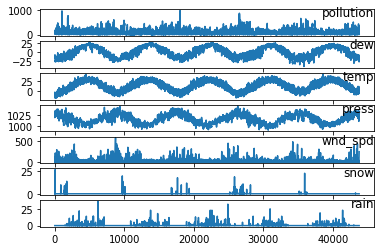

In [0]:
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

## Regresión

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg

## Scaler y Encoder

Se deben reescalar los valores numéricos y se codifican las variables categóricas

In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
n_hours=3
n_features=8
values = dataset.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  ...   var6(t)   var7(t)  var8(t)
3   0.129779   0.352941   0.245902  ...  0.008391  0.037037      0.0
4   0.148893   0.367647   0.245902  ...  0.009912  0.074074      0.0
5   0.159960   0.426471   0.229508  ...  0.011433  0.111111      0.0
6   0.182093   0.485294   0.229508  ...  0.014492  0.148148      0.0
7   0.138833   0.485294   0.229508  ...  0.017551  0.000000      0.0

[5 rows x 25 columns]


## Train/Test Split

In [0]:
values = reframed.values
n_train_hours = 4 * 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

El último valor es el valor a predecir

In [0]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(35040, 24) 35040 (35040,)


Se deben redimensionar los datos [samples, timesteps, features]

In [0]:
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 3, 8) (35040,) (8757, 3, 8) (8757,)


## Modelo y Entrenamiento

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
model = Sequential()
model.add(LSTM(32, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Using TensorFlow backend.


In [0]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35040 samples, validate on 8757 samples
Epoch 1/50





 - 5s - loss: 0.0339 - val_loss: 0.0615
Epoch 2/50
 - 4s - loss: 0.0165 - val_loss: 0.0225
Epoch 3/50
 - 4s - loss: 0.0116 - val_loss: 0.0102
Epoch 4/50
 - 4s - loss: 0.0087 - val_loss: 0.0103
Epoch 5/50
 - 4s - loss: 0.0072 - val_loss: 0.0111
Epoch 6/50
 - 4s - loss: 0.0070 - val_loss: 0.0098
Epoch 7/50
 - 5s - loss: 0.0060 - val_loss: 0.0077
Epoch 8/50
 - 4s - loss: 0.0047 - val_loss: 0.0081
Epoch 9/50
 - 4s - loss: 0.0050 - val_loss: 0.0042
Epoch 10/50
 - 4s - loss: 0.0037 - val_loss: 0.0051
Epoch 11/50
 - 4s - loss: 0.0036 - val_loss: 0.0036
Epoch 12/50
 - 4s - loss: 0.0028 - val_loss: 0.0036
Epoch 13/50
 - 4s - loss: 0.0029 - val_loss: 0.0039
Epoch 14/50
 - 4s - loss: 0.0026 - val_loss: 0.0035
Epoch 15/50
 - 4s - loss: 0.0025 - val_loss: 0.0027
Epoch 16/50
 - 4s - loss: 0.0027 - val_loss: 0.0030
Epoch 17/50
 - 4s - loss: 

## Curvas de Aprendizaje

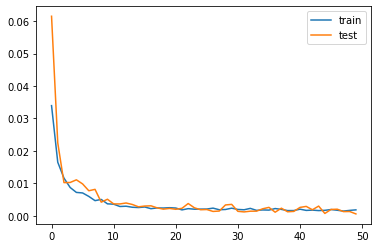

In [0]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Evaluar el Modelo

In [0]:
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [0]:
inv_yhat = np.concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [0]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [0]:
rmse = np.sqrt(np.mean((inv_y-inv_yhat)**2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.814
